In [5]:
import pandas as pd
mat = pd.read_csv("../data/student-mat.csv",sep=";")
mat.head()



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


 ## . Data Understanding
We first inspect the dataset structure, dimensions, and data types.


In [6]:
mat.shape
mat.info()
mat.describe()


(395, 33)

### Dataset Overview

The dataset contains the records of students’ academic performance, including their demographics, learning behavior, and grades for various exams (G1, G2, G3). G3 represents the final grade and will be the main aspect of the students’ performance.

## 2.Data Cleaning
We check for missing values and prepare the dataset for analysis.

In [9]:
mat.isnull().sum()


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## 3. Feature Engineering
New variables were created to make the dataset more interpretable, including final percentage and performance categories.


In [10]:
mat["final_percentage"] = (mat["G3"] / 20) * 100
mat.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_percentage
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,30.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,30.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,50.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,75.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,50.0


In [12]:
def performance(p):
    if p < 40:
        return "Fail"
    elif p < 60:
        return "Average"
    elif p < 80:
        return "Good"
    else:
        return "Excellent"

mat["performance_category"] = mat["final_percentage"].apply(performance)


In [13]:
mat["performance_category"].value_counts()


performance_category
Average      163
Good         122
Fail          70
Excellent     40
Name: count, dtype: int64

### Student Performance Distribution

Students were categorized into performance groups based on final percentage. This helps identify the proportion of students at risk (Fail) and high performers (Excellent), which is useful for academic intervention planning.


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
category_counts = mat["performance_category"].value_counts()
category_counts



performance_category
Average      163
Good         122
Fail          70
Excellent     40
Name: count, dtype: int64

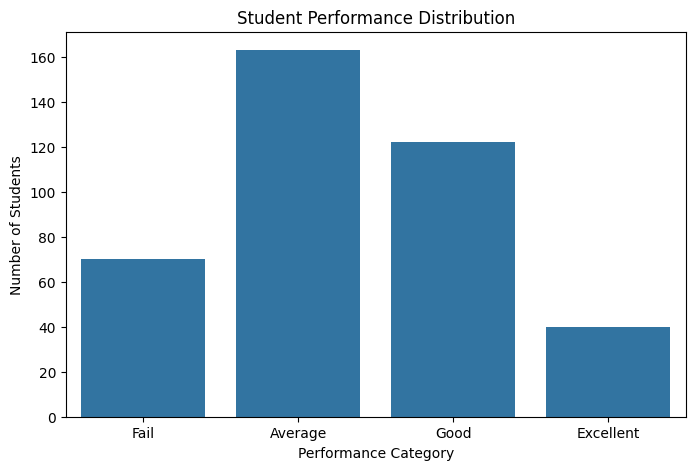

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x="performance_category", data=mat)
plt.title("Student Performance Distribution")
plt.xlabel("Performance Category")
plt.ylabel("Number of Students")

plt.savefig("../images/performance_distribution.png")
plt.show()



## Performance Distribution Analysis
This visualization shows how students are distributed across performance categories based on final percentage.


## Study Time vs Student Performance
This analysis investigates whether increased study time leads to better academic performance.


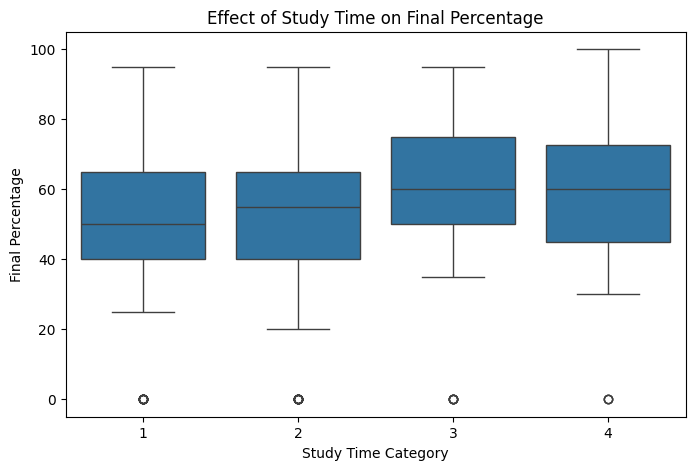

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x="studytime", y="final_percentage", data=mat)
plt.title("Effect of Study Time on Final Percentage")
plt.xlabel("Study Time Category")
plt.ylabel("Final Percentage")

plt.savefig("../images/studytime_vs_performance.png")
plt.show()



### Insight

Students who spend more time studying tend to achieve higher final percentages. The median score increases as study time category increases, indicating a positive relationship between study effort and academic performance.


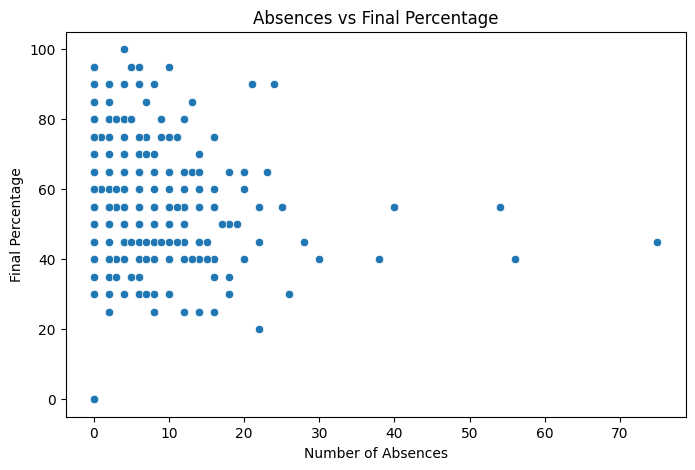

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="absences", y="final_percentage", data=mat)
plt.title("Absences vs Final Percentage")
plt.xlabel("Number of Absences")
plt.ylabel("Final Percentage")

plt.savefig("../images/absences_vs_performance.png")
plt.show()


### Insight

Students with higher numbers of absences generally achieve lower final percentages. The visualization suggests a negative relationship between attendance and academic performance, indicating that consistent attendance plays a significant role in student success.


## Correlation Analysis
We compute correlations between numerical variables to identify factors most associated with student performance.


In [22]:
numeric_data = mat.select_dtypes(include=['int64', 'float64'])
numeric_data.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_percentage
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,30.0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,30.0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,50.0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,75.0
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,50.0


In [23]:
correlation_matrix = numeric_data.corr()
correlation_matrix


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_percentage
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660,-0.054660


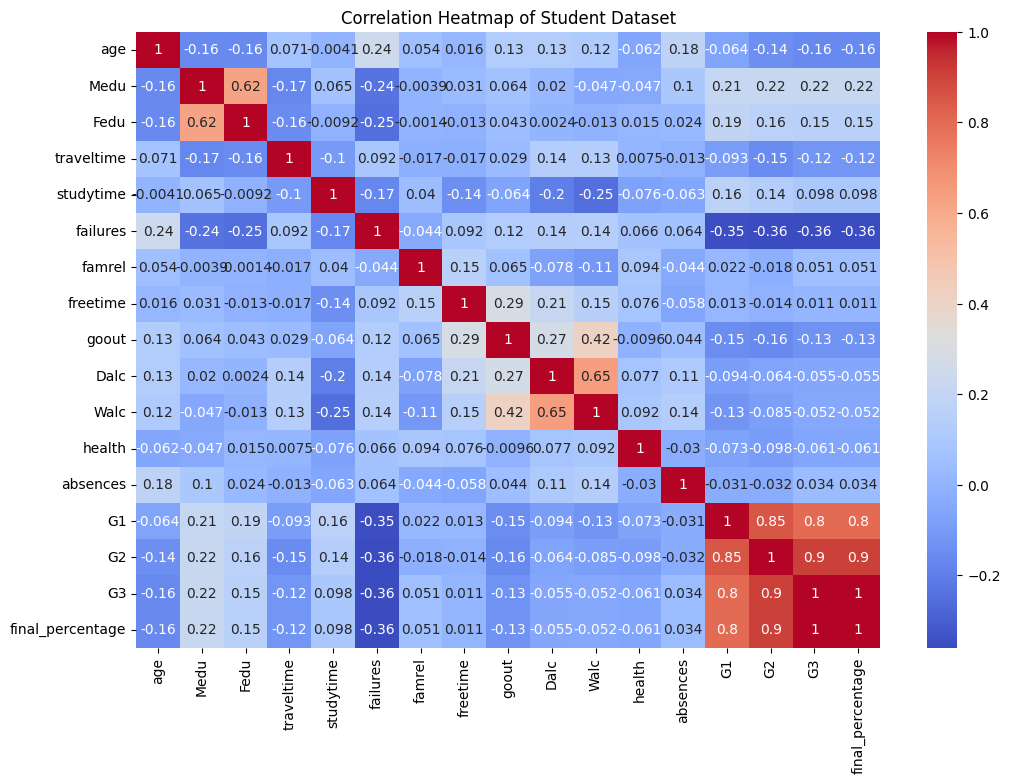

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Student Dataset")

plt.savefig("../images/correlation_heatmap.png")
plt.show()


### Insight

The correlation heatmap shows that previous grades (G1 and G2) have a strong positive correlation with the final grade (G3). Additionally, the number of past failures has a strong negative correlation with final performance, indicating that students with academic difficulties in the past are more likely to perform poorly in the final exam.
